In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
combined_df = pd.merge(ride_data_df, city_data_df, on='city', how ='left')

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

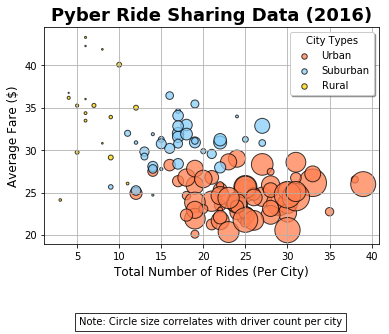

In [11]:
# Obtain the x and y coordinates for each of the three city types
city_rides = combined_df.groupby('city')['ride_id'].count()
average_fare = combined_df.groupby('city')['fare'].mean()
drivers_per_city = combined_df.groupby('city')['driver_count'].sum()

rural = combined_df.loc[combined_df['type'] == "Rural"]
rural_rides = rural.groupby('city')['ride_id'].count()
rural_fare = rural.groupby('city')['fare'].mean()
rural_drivers = rural.groupby('city')['driver_count'].sum()

suburban = combined_df.loc[combined_df['type'] == "Suburban"]
suburban_rides = suburban.groupby('city')['ride_id'].count()
suburban_fare = suburban.groupby('city')['fare'].mean()
suburban_drivers = suburban.groupby('city')['driver_count'].sum()

urban = combined_df.loc[combined_df['type'] == "Urban"]
urban_rides = urban.groupby('city')['ride_id'].count()
urban_fare = urban.groupby('city')['fare'].mean()
urban_drivers = urban.groupby('city')['driver_count'].sum()

# Build the scatter plots for each city types
plt.scatter(urban_rides, urban_fare, marker = 'o', color = ('coral'), edgecolors = 'black',
           s= ((urban_drivers)/3), alpha = .75, label= 'Urban')

plt.scatter(suburban_rides, suburban_fare, marker = 'o', color = ('lightskyblue'), edgecolors = 'black',
           s= ((suburban_drivers)/3), alpha = .75, label= 'Suburban')

plt.scatter(rural_rides, rural_fare, marker = 'o', color = ('gold'), edgecolors = 'black',
           s= ((rural_drivers)/3), alpha = .75, label= 'Rural')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Total Number of Rides (Per City)', fontsize = 12)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.title('Pyber Ride Sharing Data (2016)', fontsize = 18, fontweight='bold')

# Create a legend
lgnd = plt.legend(title="City Types", shadow=True, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
text = 'Note: Circle size correlates with driver count per city'
plt.annotate(text, xy=(1, 1), xytext=(-300, -300), fontsize=10,
    xycoords='axes fraction', textcoords='offset points',
    bbox=dict(facecolor='white', alpha=0.8),
    horizontalalignment='left', verticalalignment='bottom')

# Save Figure
plt.savefig('../Images/pyber_ride_sharing_data.png')

# Show plot
plt.show()


## Total Fares by City Type

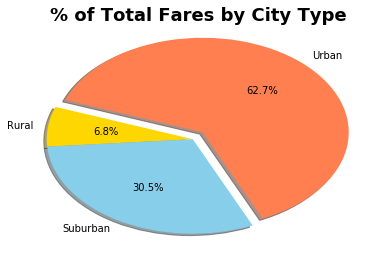

In [7]:
# Calculate Type Percents
total_fares_per_city = combined_df.groupby('type')['fare']
total_fare = total_fares_per_city.sum()

# Build Pie Chart
type_labels = 'Rural', 'Suburban', 'Urban'
fares_pie_size = total_fare
colors = ['gold', 'skyblue', 'coral']
explode = [0,0,0.10]
plt.pie(fares_pie_size, explode = explode, labels = type_labels, colors= colors,
autopct='%1.1f%%', shadow=True, startangle=160)
plt.title('% of Total Fares by City Type', fontsize = 18, fontweight='bold')
plt.axis('auto')

# Save Figure
plt.savefig('../Images/fares_by_city_type_data.png')

# Show plot
plt.show()

## Total Rides by City Type

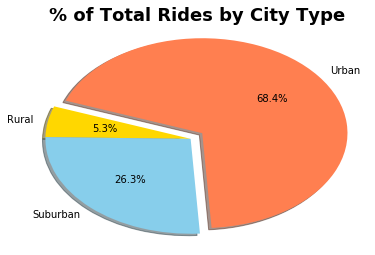

In [13]:
# Calculate Ride Percents
total_rides_by_city = combined_df.groupby('type')['ride_id'].count()

# Build Pie Chart
rides_pie_size = total_rides_by_city
plt.pie(rides_pie_size, explode=explode, labels = type_labels, colors= colors,
autopct='%1.1f%%', shadow=True, startangle=160)
plt.title('% of Total Rides by City Type', fontsize = 18, fontweight='bold')
plt.axis('auto')

# Save Figure
plt.savefig('../Images/rides_by_city_type_data.png')

# Show plot
plt.show()

## Total Drivers by City Type

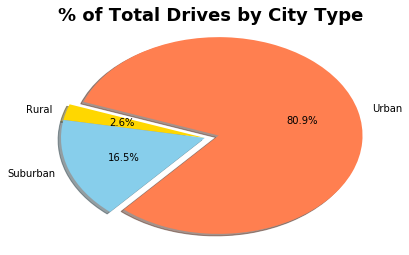

In [9]:
# Calculate Driver Percents
drivers = combined_df.drop_duplicates(subset="city",keep="first")
total_drivers_by_city = drivers.groupby('type')['driver_count'].sum()

# Build Pie Charts
drivers_pie_size = total_drivers_by_city

rides_pie_size = total_rides_by_city
plt.pie(drivers_pie_size, explode=explode, labels = type_labels, colors= colors,
autopct='%1.1f%%', shadow=True, startangle=160)
plt.title('% of Total Drives by City Type', fontsize = 18, fontweight='bold') 
plt.axis('auto')

# Save Figure
plt.savefig('../Images/drivers_by_city_type_data.png')

# Show plot
plt.show()

In [6]:
#Analysis

#trend_1. Urban cities have the highest percentage of total fares at 62.7%.
#trend_2. Rural cities have the lowest number of rides with the highest being 12 total rides in Michaelberg.
#trend_3. Urban cities have the highes percentage of total drivers at 80.9%.